<a href="https://colab.research.google.com/github/jb2814/databootcampproject/blob/master/Kickstarter_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Bootcamp Final Project - Kickstarter Data Exploration
Sarah Hansen, Yasemin Esmen, Jassica Bouvier 


---


Fall 2018 MBA Section

## Background & Objectives

Kickstarter is a global crowdfunding platform founded in 2009. The company's stated mission is to "help bring creative projects to life".  To date, Kickstarter has reportedly received more than $4 billion in pledges from 15.5 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.The purpose of this analysis is quite simply to learn more about Kickstarter. We will explore a variety of questions.

The dataset we are using was posted by Mickaël Mouillé on Kaggle [here](https://www.kaggle.com/kemical/kickstarter-projects). For this analysis, we are using data contained in the file ks-projects-201801.

For better viewing, please refer to our github repository: 
    https://github.com/jb2814/databootcampproject/blob/master/Kickstarter.ipynb

## Importing Packages

In [1]:
import pandas as pd                  
import matplotlib.pyplot as plt       
import matplotlib as mpl
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


%matplotlib inline

import datetime as dt
print(dt.date.today())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


2018-12-21


## Importing the Data

We will access our data from Google Drive and use [Colaboratory](https://github.com/jupyter/colaboratory) to do our analysis.  Colaboratory is a third party application which creates shared Jupyter notebooks that can be accessed through Google Drive. The below code imports libraries that allow the Google Cloud SDK to access the Google Drive of the currently logged in user. As a result, we can access our files from Python code running in Colaboratory.  The code for this process was sourced from [here](https://mikulskibartosz.name/how-to-load-data-from-google-drive-to-pandas-running-in-google-colaboratory-a7f6a033c997).



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In order to access the data, we first need to find the Google file ID of the csv file saved in Drive. We can do so using the below code.

In [3]:
listed = drive.ListFile({'q': "title contains 'ks-projects-201801.csv' and '1qjkEWVNEbz_Y8BGImUIMKuAnfALIZMdz' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title ks-projects-201801.csv, id 14pAbAz2WPJL6EL6tTCUupB2HmHSDHppj


We then need to create a directory for the file to be stored. 

In [0]:
download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

We can access the file from the directory and read it into the notebook using pandas.

In [0]:
output_file = os.path.join(download_path, 'ks-projects-201801.csv')
temp_file = drive.CreateFile({'id': '14pAbAz2WPJL6EL6tTCUupB2HmHSDHppj'})
temp_file.GetContentFile(output_file)

In [0]:
data = pd.read_csv(output_file,
                  encoding='latin-1',error_bad_lines = False)

In [7]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Exploring the Data 

In [8]:
data.shape

(378661, 15)

The dataset includes information on over 378,000 projects. The data is described as follows:

* **ID**	= internal id	
* **name** = 	name of the project	
* **category** = sub category
* **main_category**	= main category 
* **currency**	= currency defined by project owner	
* **deadline**	= deadline	
* **goal**	= fundraising goal	
* **launched**	= launched time	
* **pledged**	= the pledged amount	
* **state**	= state of the project (successful, failed, etc.)
* **backers**	= number of backers
* **country**	= country	
* **usd_pledged**	= pledged amount in USD	
* **usd_pledged real**	= pledged amount in USD
* **usd_ goal_real**	= pledged goal in USD

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


What's the difference between **'usd pledged'** and **'usd_pledged_real'**? According to the glossary, **'usd-pledged'** is the US dollar conversion amount provided by Kickstarter. **'usd_pledged_real'** is the US dollar conversion amount calculated using fixer.io, a foreign currency conversion API.  Because **'usd pledged**' has almost 4,000 null values, we will use **'usd_pledged_real'** in this analysis. 

In [10]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

We therefore will drop **'usd-pledged'** from the dataframe and rename the columns containing the actual USD data to more clearly identify them.

In [0]:
data = data.drop(['usd pledged'], axis = 1)

In [0]:
data = data.rename(columns = {'usd_pledged_real':'usd_pledged_actual','usd_goal_real':'usd_goal'})

For every project, we may also want to know the ratio of the actual pledged amount to the goal amount. Therefore, we will create a new column called **'usd_pledged_to_goal'**.

In [0]:
data['usd_pledged_to_goal'] = data['usd_pledged_actual']/data['usd_goal']

In order to understand the scale of projects launched on Kickstarter over time, we also want to run analysis on 'launched' date. In order to do so, we broke up the date into month and year and added these columns to the dataframe.

In [0]:
data['launched'] = pd.to_datetime(data['launched'])
data['launch_month_year'] = data['launched'].dt.to_period("M")
data['launch_year'] = data['launched'].dt.to_period("A")
data['launch_month'] = data['launched'].dt.month


We then added another set of colums to analyze success rates. In **'success'**, we placed a 1 if state = success, otherwise we placed a 0. In '**not_success'**, we placed a 1 if state != success, otherwise we placed a 0.

In [0]:
data['success'] = np.where(data['state']=='successful', 1, 0)

In [0]:
data['not_success'] = np.where(data['state']!='successful', 1, 0)

We also added a** 'count'** column to make counting easier in the analysis.

In [0]:
data['count'] = 1

In [18]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged_actual,usd_goal,usd_pledged_to_goal,launch_month_year,launch_year,launch_month,success,not_success,count
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,1533.95,0.000000,2015-08,2015,8,0,1,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,2421.0,30000.00,0.080700,2017-09,2017,9,0,1,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,45000.00,0.004889,2013-01,2013,1,0,1,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,5000.00,0.000200,2012-03,2012,3,0,1,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,19500.00,0.065795,2015-07,2015,7,0,1,1


In [19]:
data.dtypes

ID                              int64
name                           object
category                       object
main_category                  object
currency                       object
deadline                       object
goal                          float64
launched               datetime64[ns]
pledged                       float64
state                          object
backers                         int64
country                        object
usd_pledged_actual            float64
usd_goal                      float64
usd_pledged_to_goal           float64
launch_month_year              object
launch_year                    object
launch_month                    int64
success                         int64
not_success                     int64
count                           int64
dtype: object

The dataframe is now complete, clean, and ready for analysis. 


## General Overview of Kickstarter Projects

Before delving into our analysis, we have provided below a general overview of projects on Kickstarter.

#### What categories of projects are most launched?



The data is divided into main categories and subcategories.

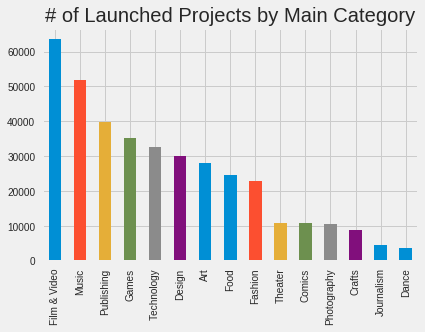

In [20]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data['main_category'].value_counts().plot(ax=ax,
        kind='bar',
        title = '# of Launched Projects by Main Category');

The most popular project main categories on Kickstarter are Fim & Video, Music, and Publishing.

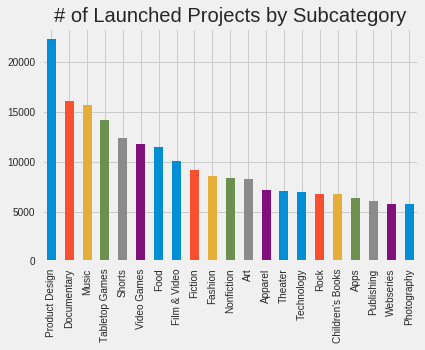

In [21]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data['category'].value_counts()[:21].plot(ax=ax,
        kind='bar',
        title = '# of Launched Projects by Subcategory');

The most popular project subcategories on Kickstarter are Product Design, Documentary, and Music. We have only plotted the top 20 most popular subcategories (out of 159 total subcategories).

#### Which categories of projects ask for the most money?

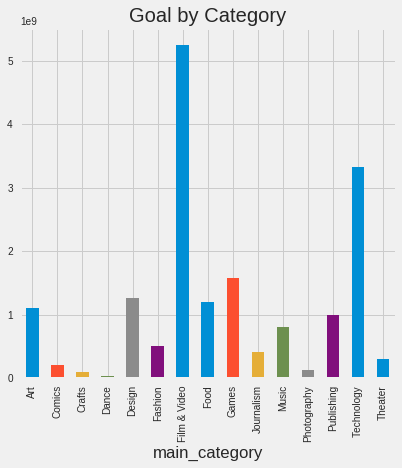

In [22]:
category_funding = data.groupby(['main_category'])['usd_goal'].sum()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
category_funding.plot(ax=ax,
        kind='bar', title = 'Goal by Category');

Film & Video leads the pack. This is not surprising given that films tend to have high production costs.

#### What categories of projects receive the most pledged dollars?

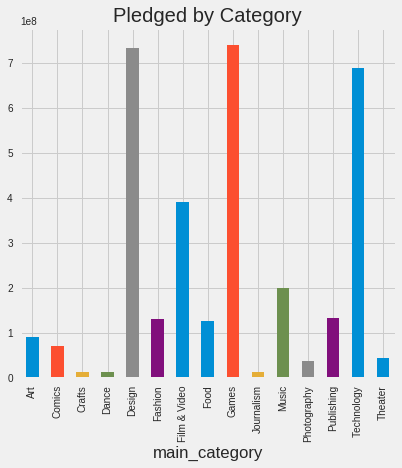

In [23]:
category_funding = data.groupby(['main_category'])['usd_pledged_actual'].sum()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
category_funding.plot(ax=ax,
        kind='bar', title = 'Pledged by Category');


Design, games, and technology receive the most pledged dollars. 

#### What is the percentage of projects have been successfully funded?

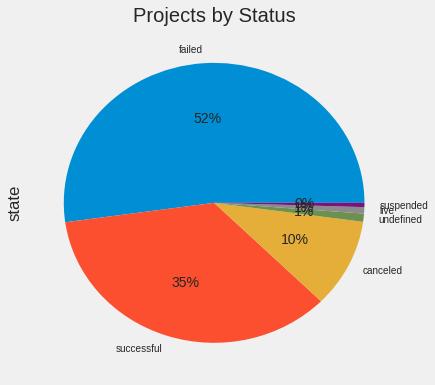

In [24]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data['state'].value_counts().plot(ax=ax,
        kind='pie',
        title = 'Projects by Status',figsize = (6,6),autopct='%.0f%%');

Approximately 65% of projects in the dataset have failed, while 35% have been successful.

#### What is the breakdown by country of Kickstarter projects?

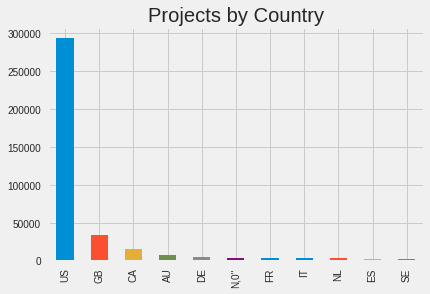

In [25]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data['country'].value_counts()[:11].plot(ax=ax,
        kind='bar',
        title = 'Projects by Country');

Most projects on Kickstarter are based out of the United States. In order to analyze non-US projects, we excluded the US in the dataset. 

In [0]:
data_woUS = data[data.country != 'US']

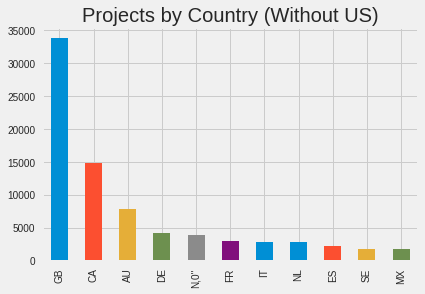

In [27]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data_woUS['country'].value_counts()[:11].plot(ax=ax,
        kind='bar',
        title = 'Projects by Country (Without US)');

Outside of the US,  projects originating out of Great Britain, Canada and Australia are most popular. From this, we infer that most participants in Kickstarter projects are English speakers.

#### How successful are successful projects?

In [0]:
data_successes = data.loc[data['usd_pledged_to_goal'] >=1]

In [29]:
data_successes.describe()

,ID,goal,pledged,backers,usd_pledged_actual,usd_goal,usd_pledged_to_goal,launch_month,success,not_success,count
count,1.370420e+05,1.370420e+05,1.370420e+05,137042.000000,1.370420e+05,1.370420e+05,137042.000000,137042.000000,137042.000000,137042.000000,137042.0
mean,1.073986e+09,1.011567e+04,2.399057e+04,261.233979,2.254240e+04,9.477405e+03,8.784771,6.395215,0.977445,0.022555,1.0
std,6.189989e+08,3.103584e+04,1.573056e+05,1491.519712,1.499754e+05,2.773888e+04,443.612264,3.317165,0.148481,0.148481,0.0
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,7.900000e-01,1.000000e-02,1.000000,1.000000,0.000000,0.000000,1.0
25%,5.360507e+08,1.250000e+03,1.990000e+03,32.000000,2.000000e+03,1.323050e+03,1.046333,4.000000,1.000000,0.000000,1.0
50%,1.076884e+09,3.850000e+03,5.105000e+03,69.000000,5.097790e+03,3.807055e+03,1.166667,6.000000,1.000000,0.000000,1.0
75%,1.608409e+09,1.000000e+04,1.330275e+04,166.000000,1.309596e+04,1.000000e+04,1.632000,9.000000,1.000000,0.000000,1.0
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.015609e+06,104277.890000,12.000000,1.000000,1.000000,1.0


The above table shows basic statistics on successful projects. We can see that, on average, successful projects made approximately 8.78x their fundraising goal. Yet, this statistic is somewhat misleading. We note that 75% of projects make 1.63x or less of their fundraising goal. The average is being lifted by some extremely successful projects, such as the one seen in the max statistic (104,277x).

**The takeaway: it's unlikely your Kickstarter project will earn more than 2x its goal, but most successful projects do indeed exceed their fundraising goals — even if only by a small margin.**

In [30]:
len(data[data['usd_pledged_to_goal'] >= 2]) /data['usd_pledged_to_goal'].count()

0.06888219277929335

Out of all projects (both successful and not successful), we can note that 6.9% of projects exceeded their fundraising goal by 100% (2x) or more. 

#### **How** badly do failed projects fail?

In [0]:
data_failures = data.loc[data['usd_pledged_to_goal'] <1]

In [32]:
data_failures.describe()

,ID,goal,pledged,backers,usd_pledged_actual,usd_goal,usd_pledged_to_goal,launch_month,success,not_success,count
count,2.416190e+05,2.416190e+05,2.416190e+05,241619.000000,241619.000000,2.416190e+05,241619.000000,241619.000000,241619.000000,241619.000000,241619.0
mean,1.075154e+09,7.118112e+04,1.567968e+03,17.354562,1411.336545,6.585991e+04,0.089025,6.499174,0.000021,0.999979,1.0
std,6.191366e+08,1.480815e+06,1.081579e+04,80.474315,7160.467043,1.442797e+06,0.152991,3.336888,0.004549,0.004549,0.0
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000,1.000000e-02,0.000000,1.000000,0.000000,0.000000,1.0
25%,5.395850e+08,2.600000e+03,1.000000e+00,1.000000,1.080000,2.690480e+03,0.000143,4.000000,0.000000,1.000000,1.0
50%,1.074463e+09,8.000000e+03,1.000000e+02,3.000000,99.000000,7.559720e+03,0.015370,7.000000,0.000000,1.000000,1.0
75%,1.611168e+09,2.350000e+04,6.870000e+02,12.000000,676.150000,2.200000e+04,0.107698,9.000000,0.000000,1.000000,1.0
max,2.147467e+09,1.000000e+08,1.748630e+06,9326.000000,757352.940000,1.663614e+08,0.999974,12.000000,1.000000,1.000000,1.0


The above table shows basic statistics on failed projects. We can see that, on average, failed projects made only approximately 9% of their fundraising goal. 50% of failed projects made 1.5% or less of their fundraising goal and 75% of failed projects made 10.8% or less.  

**The takeaway: if you fail on Kickstarter, you're likely to fail by a large margin.**

In [33]:
len(data[data['usd_pledged_to_goal'] == 0]) /data['usd_pledged_to_goal'].count()

0.1387177448958303

Out of all projects (both successful and not successful), we can note that approximately 30% make only 1% or less of their fundraising goal. 

##  Trends on Kickstarter (2009-2018) 
Below, we have provided an analysis of trends on Kickstarter over time to better understand high level yearly trends on the platform.

#### Creating the Dataframe

In order to analyze summary data by year, we created a new dataframe with the year as the index. In order to do so, we converted the dtype of **'launch_year' ** to int so that we could iterate through each year. The dataset includes data from 2009 to 2018, but 2018 is not complete.

In [0]:
data['launch_year'] = data['launch_year'].astype(str)
data['launch_year'] = data['launch_year'].astype(int)

In [0]:
data_byyear ={}
for year in range(2009, 2019):
  data_byyear[year]=data[data['launch_year']==year]['launch_year'].count()

We then created the dataframe with year as the index.

In [0]:
data_byyear = pd.Series(data_byyear)
data_byyear = pd.DataFrame(data_byyear)
data_byyear = data_byyear.rename(columns = {0:'count of projects'})

We then added other yearly summary data to the new dataframe by creating additional loops and adding the output of these loops to the data_byyear dataframe.

In [0]:
data1 ={}
for year in range(2009, 2019):
  data1[year]=data[data['launch_year']==year]['usd_goal'].sum()/1000000

In [0]:
data2 ={}
for year in range(2009, 2019):
  data2[year]=data[data['launch_year']==year]['usd_pledged_actual'].sum()/1000000

In [0]:
data_byyear['total asked($mil)'] = pd.Series(data1)

In [0]:
data_byyear ['total pledged ($mil)'] = pd.Series(data2)

In [0]:
data_byyear['pledged/goal'] = data_byyear ['total pledged ($mil)']/data_byyear['total asked($mil)']

In [0]:
data3 ={}
for year in range(2009, 2019):
  data3[year]=data[data['launch_year']==year]['usd_pledged_to_goal'].median()

In [0]:
data_byyear ['median pledged to goal ratio'] = pd.Series(data3)

In [0]:
data4 ={}
for year in range(2009, 2019):
  data4[year]=data[data['launch_year']==year]['usd_pledged_to_goal'].mean()

In [0]:
data_byyear ['avg pledged to goal ratio'] = pd.Series(data4)

In [0]:
data5 ={}
for year in range(2009, 2019):
  data5[year]=data[data['launch_year']==year]['success'].sum()

In [0]:
data_byyear ['total successful'] = pd.Series(data5)

In [0]:
data6 ={}
for year in range(2009, 2019):
  data6[year]=data[data['launch_year']==year]['not_success'].sum()

In [0]:
data_byyear ['total not successful'] = pd.Series(data6)

We then inserted two columns to calcualte success and not success rates by year.

In [0]:
data_byyear ['% successful'] = data_byyear ['total successful']/(data_byyear ['total successful']+data_byyear ['total not successful'])

In [0]:
data_byyear ['% not successful'] = data_byyear ['total not successful']/(data_byyear ['total successful']+data_byyear ['total not successful'])

In [0]:
data7 ={}
for year in range(2009, 2019):
  data7[year]=data[data['launch_year']==year]['backers'].mean()

In [0]:
data_byyear ['avg backers per project'] = pd.Series(data7)

In [0]:
data8 ={}
for year in range(2009, 2019):
  data8[year]=data[data['launch_year']==year]['backers'].sum()

In [0]:
data_byyear ['total backers'] = pd.Series(data8)

In [0]:
data_byyear ['$ per backer'] = data_byyear['total pledged ($mil)']*1000000/data_byyear['total backers']

#### What has happened on a yearly basis since Kickstarter launched in 2009?

The dataframe below contains all of the aggregate yearly data. 

In [57]:
data_byyear

,count of projects,total asked($mil),total pledged ($mil),pledged/goal,median pledged to goal ratio,avg pledged to goal ratio,total successful,total not successful,% successful,% not successful,avg backers per project,total backers,$ per backer
2009,1329,9.385495,2.845501,0.303181,0.255400,8.648366,579,750,0.435666,0.564334,32.925508,43758,65.028135
2010,10519,138.793983,29.458273,0.212245,0.261935,2.111913,4593,5926,0.436638,0.563362,38.680008,406875,72.401285
2011,26237,326.340132,103.752594,0.317928,0.369150,1.218571,12171,14066,0.463887,0.536113,53.225331,1396473,74.296169
2012,41165,822.360781,322.451880,0.392105,0.291110,1.183560,17892,23273,0.434641,0.565359,105.521341,4343786,74.232911
2013,44851,1234.076888,478.540726,0.387772,0.317647,2.927810,19415,25436,0.432878,0.567122,140.299391,6292568,76.048559
2014,67745,3374.493524,524.650854,0.155475,0.088000,2.129250,21107,46638,0.311565,0.688435,91.439604,6194576,84.695200
2015,77300,5722.985754,687.548673,0.120138,0.044442,3.635040,20971,56329,0.271294,0.728706,97.180569,7512058,91.526007
2016,57184,3388.155812,656.949944,0.193896,0.096388,7.236768,18766,38418,0.328169,0.671831,125.010562,7148604,91.899054
2017,52200,2193.456921,623.999581,0.284482,0.160000,2.692778,18462,33738,0.353678,0.646322,127.459004,6653360,93.787136
2018,124,1.722718,0.063223,0.036699,0.023095,0.408755,0,124,0.000000,1.000000,9.362903,1161,54.455461


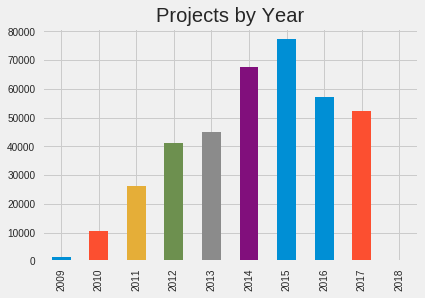

In [58]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data_byyear['count of projects'].plot(ax=ax,
        kind='bar',
        title = 'Projects by Year',legend=False);

We note that 2015 was a peak year for Kickstarter in terms of number of projects launched with almost 80,000 projects. We believe this is due to the fact that Kickstarter launched in 12 European countries in that year. From this data, it appears that there is a downward trend in the number of projects on the platform.




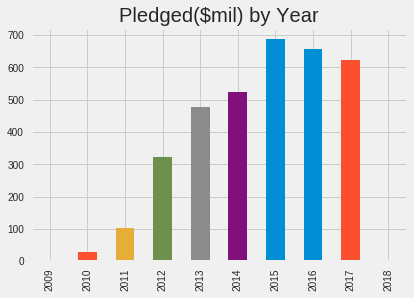

In [59]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
data_byyear['total pledged ($mil)'].plot(ax=ax,
        kind='bar',
        title = 'Pledged($mil) by Year', legend=False);

2015 was also a peak year in terms for funding. The platform rasied over $687 million in 2015.

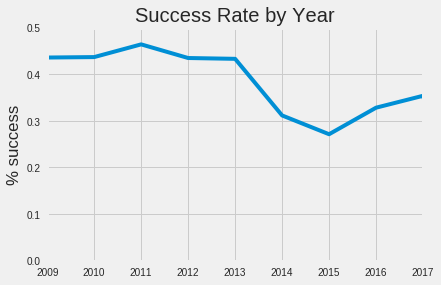

In [60]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_ylabel('% success')
ax.set_xlim(2009, 2017)
ax.set_ylim(0, .5)
data_byyear['% successful'].plot(ax=ax,
        kind='line',
        title = 'Success Rate by Year',legend=False);


Interestingly, 2015 was the worst year for success on Kickstarter. Only 27% of projects met their fundraising goals in 2015 — the lowest  yearly success rate reflected in the data.

In [0]:
success_fail = data.groupby(['launch_year','not_success'])['name'].size().unstack()
success_fail = success_fail.drop([1970,2018])

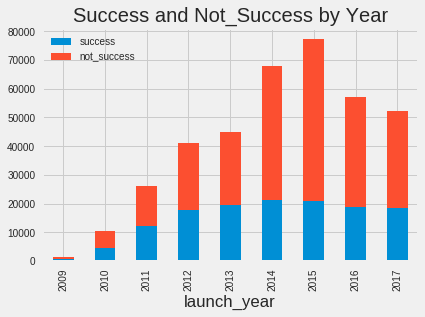

In [62]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
success_fail.plot(ax=ax,
        kind='bar',stacked = True, legend=True, title = 'Success and Not_Success by Year')

plt.legend(['success','not_success']);

**The takeaway: the number of successful projects has stayed relatively level over time. In 2015, the number of failed projects increased, which lowered the overall success rate — despite the fact that more dollars were raised in 2015 than in any other year.**

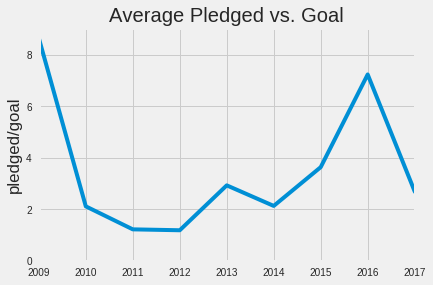

In [63]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_ylabel('pledged/goal')
ax.set_xlim(2009, 2017)
data_byyear['avg pledged to goal ratio'].plot(ax=ax,
        kind='line',
        title = 'Average Pledged vs. Goal',legend=False);

Average pledged to goal ratios are all over the map. This is likely because some very successful projects lift the average above 1 (as we saw earlier in this analysis), despite the fact that most projects on Kickstarter fail.

**The takeaway: average pledged to goal ratios are more indicative of very successful outliers than they are of average project performance.**

In [0]:
categorybyyear = data.groupby(['launch_year','main_category'])['count'].sum().unstack()
categorybyyear = categorybyyear.drop([1970,2018])

How has the popularity of categories of launched projects changed over time?

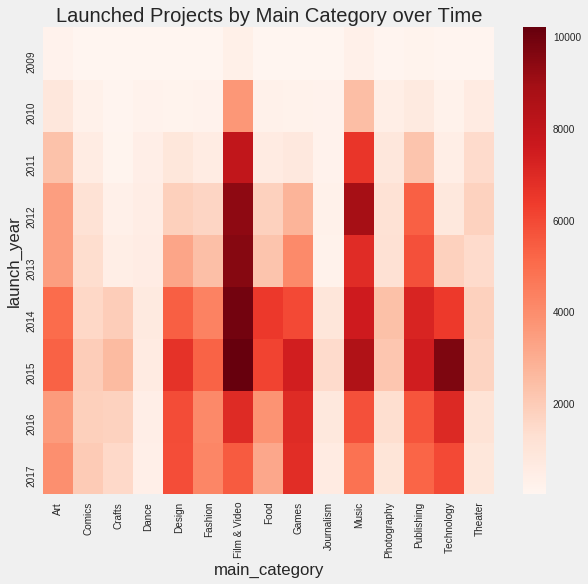

In [65]:
ig, ax = plt.subplots(figsize=(9,8))     
sns.heatmap(categorybyyear, cmap="Reds")
plt.title('Launched Projects by Main Category over Time');

Film & Video has been the most popular category overall (as seen above), but in 2016 and 2017, the popularity of this category has subsided somewhat. Technology and Games have increased in popularity over time.

##  Understanding Success vs. Failure on Kickstarter

#### Category
Are there particular categories that experience more success?

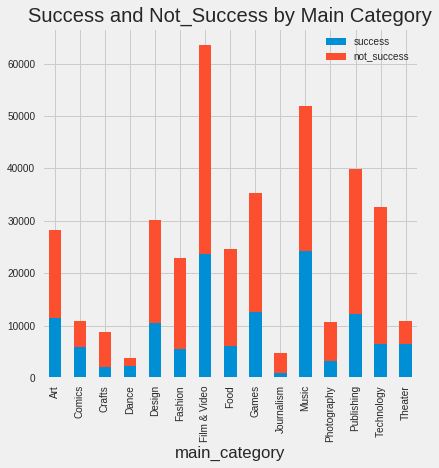

In [66]:
success_fail_bycategory = data.groupby(['main_category','not_success'])['count'].sum().unstack()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
success_fail_bycategory.plot(ax=ax,
        kind='bar',stacked = True, legend=True, title = 'Success and Not_Success by Main Category')

plt.legend(['success','not_success']);

Based on this graph, we can see that some categories are more successful overall than others. Film & Video for example, along with Music, have higher ratios of successful to not successful projects. Technology and Fashion, on the other hand, are comprised of many more failed projects than successful ones.

We can also analyze success by category over time.

In [0]:
data_successes_category = data_successes.groupby(['launch_year','main_category'])['count'].sum().unstack()

Text(0.5,1,'Success by Main Category over Time')

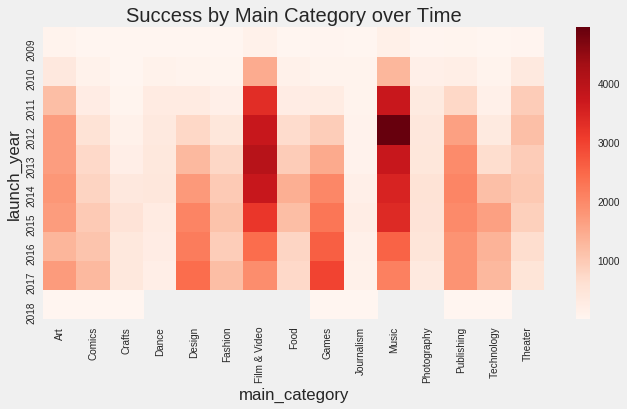

In [68]:
ig, ax = plt.subplots(figsize=(10,5))     
sns.heatmap(data_successes_category, cmap="Reds");
plt.title('Success by Main Category over Time')

Most successful projects are in Film & Video and Music. Recently, the Games category has also experienced some success. 

Are there particular categories that experience more failure?

In [0]:
data_failures_category = data_failures.groupby(['launch_year','main_category'])['count'].sum().unstack()

Text(0.5,1,'Failure by Main Category over Time')

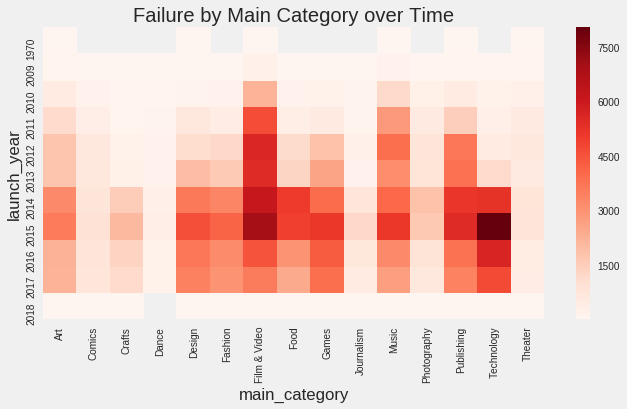

In [70]:
ig, ax = plt.subplots(figsize=(10,5))     
sns.heatmap(data_failures_category, cmap="Reds");
plt.title('Failure by Main Category over Time')

Interestingly, the Film & Video category also sees the most failed projects. We believe that this is because Film & Video is the most popular category in general on Kickstarter. Both Publishing & Music also see a lot of failed projects — though not nearly as many as Film & Video.

How much funding is delivered (for successful projects) vs. returned (for failed projects)? 

*Note: Pledges for projects that don't meet their funding goals are returned to the backers.*

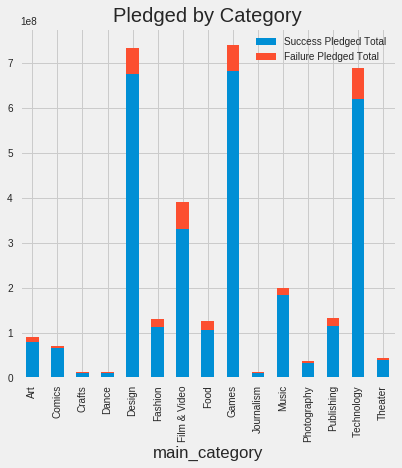

In [71]:
category_funding_s = data_successes.groupby(['main_category'])['usd_pledged_actual'].sum()
category_funding_f = data_failures.groupby(['main_category'])['usd_pledged_actual'].sum()
pledged_total_sf = pd.DataFrame(category_funding_s).rename(
    columns = {'usd_pledged_actual':'Success Pledged Total'}).merge(
    pd.DataFrame(category_funding_f).rename(columns ={'usd_pledged_actual':'Failure Pledged Total'}),
    left_index = True, right_index = True)
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
pledged_total_sf.plot(ax=ax,
        kind='bar', stacked = True, title = 'Pledged by Category');

From this plot, which shows the ratio of delivered dollars to returned dollars ($mill), we can see that the majority of Kickstarter is in fact delivered to successful projects. Projects that receive less total pledged dollars tend to have a higher ratio of delivered to returned dollars. For example, the ratio for Comics is higher than that for Film & Video. This is not surprising the low product costs of Comics relative to Film & Video. This ratio does not take into account the volume of the ask for a given project or category. In future analysis, we would suggest normalizing the data by controlling for volume. 

#### Backers
What is the relationship between the number of backers and the amount of money pledged?

In [72]:
d3 = smf.ols('usd_pledged_actual~ backers', data=data)
d4 = d3.fit()
print(d4.summary())
                                               

                            OLS Regression Results                            
Dep. Variable:     usd_pledged_actual   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 4.945e+05
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:18:56   Log-Likelihood:            -4.7028e+06
No. Observations:              378661   AIC:                         9.406e+06
Df Residuals:                  378659   BIC:                         9.406e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1088.4658     98.017     11.105      0.0

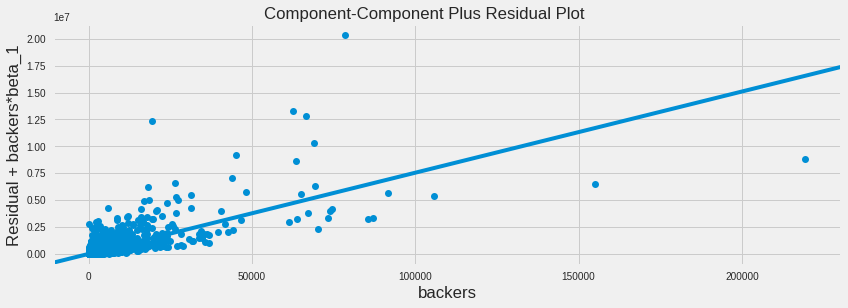

In [73]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(d4, fig=fig)

There appears to be a positive relationship between the number of backers and the amount pledged. For every 1 additional backer, the pledged amount (per backer) should increase by $75 USD. 

#### Launch Month
What is the relationship between launch month and success or failure?

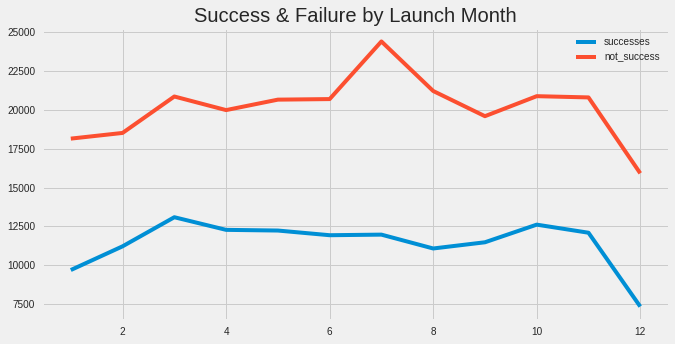

In [74]:
success_months = data_successes['launch_month'].value_counts().rename('successes').sort_index()
not_success_months = data_failures['launch_month'].value_counts().rename('not_success').sort_index()
succes_fail_month = pd.concat([success_months,not_success_months], axis=1, join='inner')
succes_fail_month.plot(figsize=(10, 5), legend=True, title='Success & Failure by Launch Month');

From the above chart, it appears that the month of project launch doesn't impact successful projects as much as it does failed projects, especially in the month of July where the spread is the largest. The code for this graph was taken from [here](https://www.kaggle.com/damirkh/where-and-when-to-kickstart). We felt this graph was relevant to include because we wanted to supplement the above graph with a visual representation showing the sharp increase in the number of failures in July.

To further analyze this sharp increase in failures in July, we looked at success vs. failure on a year by year basis and discovered that 2014 was the outlier.

In [0]:
data_2014 = data.loc[data['launch_year'] == 2014]

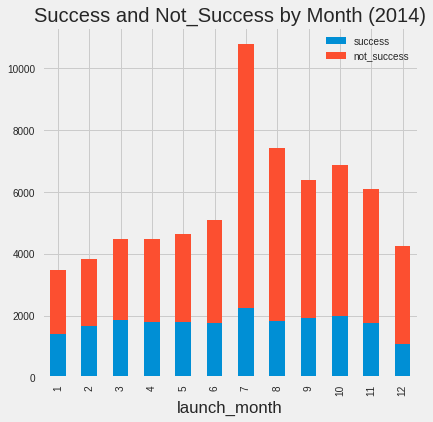

In [77]:
success_fail_bymonth_2014 = data_2014.groupby(['launch_month','not_success'])['count'].sum().unstack()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
success_fail_bymonth_2014.plot(ax=ax,
        kind='bar',stacked = True, legend=True, title = 'Success and Not_Success by Month (2014)')

plt.legend(['success','not_success']);


We can see from the above graph that July 2014 saw an atypical spike in failed launches. This explains the bump in failed projects in July in the above line graph.

#### Country
Does the country of origin impact success or failure?

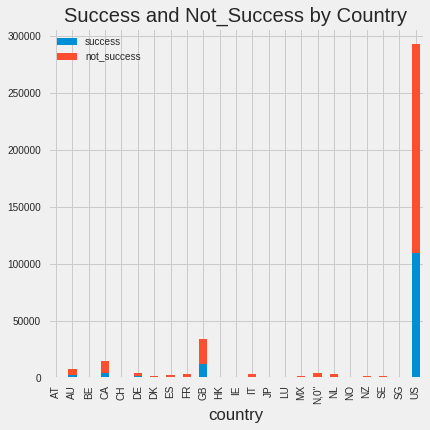

In [78]:
success_fail_bycountry = data.groupby(['country','not_success'])['count'].sum().unstack()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
success_fail_bycountry.plot(ax=ax,
        kind='bar',stacked = True, legend=True, title = 'Success and Not_Success by Country')

plt.legend(['success','not_success']);

This data indicates that slightly over 1/3 of projects fail in the United States, and that this trend generally holds for Great Britain and Canada, the next two largest countries. Again, we can drop the United States from the data to get a better idea of which countries have greater rates of success. 

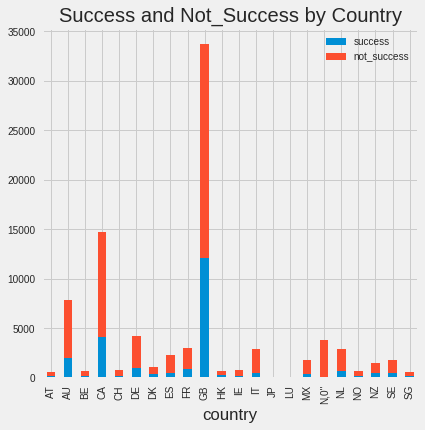

In [79]:
success_fail_bycountry_woUS = data_woUS.groupby(['country','not_success'])['count'].sum().unstack()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
success_fail_bycountry_woUS.plot(ax=ax,
        kind='bar',stacked = True, legend=True, title = 'Success and Not_Success by Country')

plt.legend(['success','not_success']);

From the above, we can see that the approximately 1/3 ratio of success to failure holds across most countries. Some countries, like Norway, have high failure rates. 

## Understanding "Successful" Projects

What defines an extremely successful project? It could be defined in two ways: 1. by projects that exceed their fundraising goals by a large multiple or 2. by projects succeed in rasing a large amount of money.

The below table shows why option is not always ideal. We note that all of the goals for 90% of the projects with the 10 largest pledged to goal ratios are 1 dollar. Exceeding 1 dollar by a large margin is not a notable accomplishment.

In [80]:
data_successes.nlargest(10, 'usd_pledged_to_goal')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged_actual,usd_goal,usd_pledged_to_goal,launch_month_year,launch_year,launch_month,success,not_success,count
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,1.0,2016-08-18 09:04:03,104277.89,successful,...,US,104277.89,1.00,104277.89000,2016-08,2016,8,1,0,1
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,1.0,2016-10-14 19:04:27,68764.10,successful,...,US,68764.10,1.00,68764.10000,2016-10,2016,10,1,0,1
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,1.0,2015-08-10 19:31:56,55266.57,successful,...,US,55266.57,1.00,55266.57000,2015-08,2015,8,1,0,1
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,1.0,2013-05-10 01:22:38,41535.01,successful,...,US,41535.01,1.00,41535.01000,2013-05,2013,5,1,0,1
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,1.0,2016-07-12 00:29:12,32843.00,successful,...,US,32843.00,1.00,32843.00000,2016-07,2016,7,1,0,1
285408,521903377,CLOCKWRIGHT: Large-Scale Analogue Time Machines,Sculpture,Art,USD,2016-01-13,1.0,2015-12-14 12:57:33,27588.23,successful,...,US,27588.23,1.00,27588.23000,2015-12,2015,12,1,0,1
369214,951161619,Heartbreak Hits â Theo Katzman's Second LP,Music,Music,USD,2017-01-03,1.0,2016-11-04 15:52:18,24675.00,successful,...,US,24675.00,1.00,24675.00000,2016-11,2016,11,1,0,1
290936,550443638,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31,10.0,2013-05-08 20:02:14,230360.67,successful,...,US,230360.67,10.00,23036.06700,2013-05,2013,5,1,0,1
15288,1077219132,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13,1.0,2016-09-13 18:03:12,22603.00,successful,...,US,22603.00,1.00,22603.00000,2016-09,2016,9,1,0,1
164449,1836862932,CO-OP THE GAME (Canceled),Video Games,Games,CAD,2013-10-14,1.0,2013-09-09 23:15:12,16949.00,canceled,...,CA,16461.73,0.97,16970.85567,2013-09,2013,9,0,1,1


Option 2 makes more sense. As we can see, the most successful project on Kickstarter is a smartwatch that raised $20,338,986 USD. 

In [81]:
data_successes.nlargest(10, 'usd_pledged_actual')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged_actual,usd_goal,usd_pledged_to_goal,launch_month_year,launch_year,launch_month,success,not_success,count
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,...,US,20338986.27,500000.0,40.677973,2015-02,2015,2,1,0,1
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,...,US,13285226.36,50000.0,265.704527,2014-07,2014,7,1,0,1
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,...,US,12779843.49,1000000.0,12.779843,2016-05,2016,5,1,0,1
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,...,US,12393139.69,100000.0,123.931397,2016-11,2016,11,1,0,1
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,...,US,10266845.74,100000.0,102.668457,2012-04,2012,4,1,0,1
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,...,US,9192055.66,20000.0,459.602783,2015-07,2015,7,1,0,1
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,...,US,8782571.99,10000.0,878.257199,2015-01,2015,1,1,0,1
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,...,US,8596474.58,950000.0,9.048921,2012-07,2012,7,1,0,1
309630,647013276,"THE 7th CONTINENT â What Goes Up, Must Come ...",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,...,US,7072757.00,40000.0,176.818925,2017-09,2017,9,1,0,1
271276,450099426,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,2016-09-10,500000.0,2016-07-13 00:47:35,6565782.50,successful,...,US,6565782.50,500000.0,13.131565,2016-07,2016,7,1,0,1


## Conclusion

Kickstarter was launched at the beginning of a crowdfunding craze. It successfully grew the overall number of projects and funding since its inception until 2015. After that, the growth tapered. We suggest that this may be related to a number of external factors: 
* The launch of a number of competitor websites such as GoFundMe and Patreon. 
* Bad press around the legitimacy of Kickstarter as a platform for independent creative artists (due to a large number of high profile celebrity projects receiving funding through the platform)
* The proliferation of social media as alternative source of patronage for creative projects 

While it it undeniable that the majority of projects listed on the platform fail, it is also the case the vast majority of pledged dollars are delivered to a project that launches successfully. From this analysis, we can conclude that Kickstarter remains a viable vehicle for funding in a variety of categories. While difficult to quantify, we hypothesize that project categories which can sustain a strong and dedicated fan base, like comic books or video games, are more likely to succeed on the platform. 



